<a href="https://colab.research.google.com/github/nfierroflo/Evolutionary-computation/blob/main/evolutivacompletoc1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
A=0.18
t0=33.941
gamma=18.975
beta=0.666
tfall=40.076
trise=13.416

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [32]:
import csv

#guardar
from csv import writer  #para guardar datos
def GuardarDatos(datasave,filename):
  with open(filename,'a') as file:
    writer_object=writer(file);
    writer_object.writerow(datasave);

In [64]:
def str_to_value(value,text):
    text = text.replace("|_div_|", "/")
    text = text.replace("_exp_", "np.exp")
    text = text.replace("_sig_", "sigmoid")
    text = text.replace("x[0]", "t")
    t = value
    return eval(text)

## late

In [33]:
fnc1 = lambda t:(A*(1-beta)*np.exp(-(t-(gamma+t0))/tfall)/(1+np.exp(-(t-t0)/trise)))

## early

In [34]:
fnc2 = lambda t:(A*(1-beta*(t-t0)/gamma)/(1+np.exp(-(t-t0)/trise)))

## guardar Datos

In [35]:
import math

def sigmoid(x):
  
    z = np.exp(-x)
    sig = 1 / (1 + z)

    return sig

In [36]:
def plotResult(x,y,r1, r2, r3,title1=' '):
  plt.plot(x,y,label='Train signal')
  plt.plot(t,r1,label='Run 0')
  plt.plot(t,r2,label='Run 1')
  plt.plot(t,r3,label='Run 2')
  plt.legend()
  plt.title('start:'+title1)
  plt.grid()

def plotFitness(epoch,f1, f2, f3,title1=''):
  plt.plot(epoch,f1,label='Run 0')
  plt.plot(epoch,f2,label='Run 1')
  plt.plot(epoch,f3,label='Run 2')
  plt.legend()
  plt.title('Fitness :'+title1)
  plt.grid()


## cambio de conjunto de entrenamiento

In [37]:
import numpy as np
limitInner = [-20, 20]
n_train = 21
t1=np.linspace(*limitInner,n_train)

limitInner = [21, 80]
n_train = 60
t2=np.linspace(*limitInner,n_train)

limitInner = [81, 100]
n_train = 10
t3=np.linspace(*limitInner,n_train)
t=np.concatenate((t1,t2,t3))

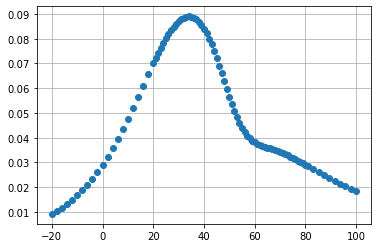

In [38]:
ylate=fnc1(t)
yearly=fnc2(t)
aux=0.2*(t-(gamma+t0))
gt=sigmoid(aux)
Totalv2=yearly*(1-gt)+ylate*gt
plt.plot(t,Totalv2,'o')
plt.grid()

In [39]:
for i in range(len(t)):
  c=t[i]
  data=[c,Totalv2[i]]
  GuardarDatos(data,'TrainTotalv3.txt')

## avance 4

C:\Users\nfier\AppData\Local\Temp\ipykernel_30556\917953519.py:1: RuntimeWarning: divide by zero encountered in true_divide
  g1=lambda x: 5.42+(((x)/(np.exp(-(np.exp(-(x))))))/(np.exp((np.exp(-(3.35)))*(x))))/(2.24)


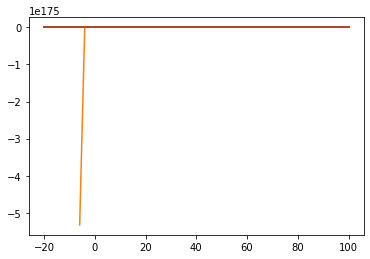

In [16]:
g1=lambda x: 5.42+(((x)/(np.exp(-(np.exp(-(x))))))/(np.exp((np.exp(-(3.35)))*(x))))/(2.24)
g0=lambda x: 2+(x)/(np.exp(np.exp((np.exp(-(4.13)))*((x)+(np.exp(-(((5.73)*(np.exp(-(8.12))))/((0.89)/(np.exp(x))))))))))
g2=lambda x: 0.93+(x)/(np.exp((np.exp(-(3.25)))*((x)+(5.34))))
plt.plot(t,Totalv2)
plt.plot(t, g1(t))
plt.plot(t, g0(t))
plt.plot(t, g2(t))

In [17]:
max(abs(Totalv2-g1(t)))

C:\Users\nfier\AppData\Local\Temp\ipykernel_30556\917953519.py:1: RuntimeWarning: divide by zero encountered in true_divide
  g1=lambda x: 5.42+(((x)/(np.exp(-(np.exp(-(x))))))/(np.exp((np.exp(-(3.35)))*(x))))/(2.24)


inf

In [18]:
g1(t)[-1]

C:\Users\nfier\AppData\Local\Temp\ipykernel_30556\917953519.py:1: RuntimeWarning: divide by zero encountered in true_divide
  g1=lambda x: 5.42+(((x)/(np.exp(-(np.exp(-(x))))))/(np.exp((np.exp(-(3.35)))*(x))))/(2.24)


6.756773547312543

In [19]:
abs(Totalv2[-1]-g1(t)[-1])

C:\Users\nfier\AppData\Local\Temp\ipykernel_30556\917953519.py:1: RuntimeWarning: divide by zero encountered in true_divide
  g1=lambda x: 5.42+(((x)/(np.exp(-(np.exp(-(x))))))/(np.exp((np.exp(-(3.35)))*(x))))/(2.24)


4.915378198395538

## preubas avance 3

In [20]:
g1=lambda x: 1.98+((x)/((np.exp(1.18))+((np.exp((x)/(8.41)))/(x))))+((0.44)/((9.27)*(x)))
g0=lambda x: 1.37+((2.28)/((5.05)+(x)))+((x)/((3.17)+(((np.exp(((x)-((np.exp(-(np.exp(np.exp(-((2.99)+((x)*(8.47))))))))/((np.exp(1.43))/(2.37))))/(5.41)))*(7.70))/(np.exp(8.51)))))
g2=lambda x:  1.71+((0.70)/(x))+((x)/(np.exp(np.exp((x)*(np.exp(-(4.09)))))))
plt.plot(x,y)
plt.plot(t, g0(t))
plt.plot(t, g1(t))
plt.plot(t, g2(t))

NameError: name 'x' is not defined

In [21]:
[[[7, 61, 3, 28, 5, 44, 5, 50, 5, 37, 5, 51, 1, 42, 3], [[1], [0, 1], [1, 0, 0], [1, 1, 0, 1], [0, 1, 1, 0, 1], [1, 0, 1, 0, 0, 0], [1, 0, 1, 0, 1, 0, 1], [1, 1, 0, 0, 1, 1, 1, 1]]], [[7, 25, 3, 43, 3, 50, 3, 62, 5, 40, 5, 17, 5, 61, 1], [[1], [1, 1], [0, 0, 1], [1, 1, 0, 1], [1, 0, 1, 0, 1], [0, 1, 1, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0], [0, 0, 0, 1, 1, 1, 1, 1]]], [2, 0], [[2, 52, 3, 43, 5], [[1], [1, 0], [1, 1, 1]]], [[5, 41, 1, 25, 5, 63, 3, 35, 3, 46, 5], [[1], [0, 1], [1, 1, 0], [0, 1, 1, 0], [0, 1, 0, 0, 1], [1, 0, 1, 1, 1, 1]]], [2, 0], [2, 0], [[6, 42, 3, 44, 1, 19, 1, 17, 3, 57, 3, 26, 5], [[1], [0, 1], [1, 1, 0], [1, 0, 1, 1], [1, 0, 0, 0, 0], [1, 0, 0, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1]]], [[4, 19, 5, 29, 3, 17, 1, 43, 3], [[1], [1, 1], [0, 1, 1], [1, 0, 0, 0], [0, 0, 0, 1, 1]]]]

[[[7, 61, 3, 28, 5, 44, 5, 50, 5, 37, 5, 51, 1, 42, 3],
  [[1],
   [0, 1],
   [1, 0, 0],
   [1, 1, 0, 1],
   [0, 1, 1, 0, 1],
   [1, 0, 1, 0, 0, 0],
   [1, 0, 1, 0, 1, 0, 1],
   [1, 1, 0, 0, 1, 1, 1, 1]]],
 [[7, 25, 3, 43, 3, 50, 3, 62, 5, 40, 5, 17, 5, 61, 1],
  [[1],
   [1, 1],
   [0, 0, 1],
   [1, 1, 0, 1],
   [1, 0, 1, 0, 1],
   [0, 1, 1, 1, 0, 1],
   [1, 1, 0, 1, 0, 1, 0],
   [0, 0, 0, 1, 1, 1, 1, 1]]],
 [2, 0],
 [[2, 52, 3, 43, 5], [[1], [1, 0], [1, 1, 1]]],
 [[5, 41, 1, 25, 5, 63, 3, 35, 3, 46, 5],
  [[1], [0, 1], [1, 1, 0], [0, 1, 1, 0], [0, 1, 0, 0, 1], [1, 0, 1, 1, 1, 1]]],
 [2, 0],
 [2, 0],
 [[6, 42, 3, 44, 1, 19, 1, 17, 3, 57, 3, 26, 5],
  [[1],
   [0, 1],
   [1, 1, 0],
   [1, 0, 1, 1],
   [1, 0, 0, 0, 0],
   [1, 0, 0, 1, 1, 0],
   [1, 1, 1, 1, 1, 1, 1]]],
 [[4, 19, 5, 29, 3, 17, 1, 43, 3],
  [[1], [1, 1], [0, 1, 1], [1, 0, 0, 0], [0, 0, 0, 1, 1]]]]

In [22]:
plt.plot(x,y,label='Data Train');
#plt.plot(t, g0(t))
plt.plot(t, g1(t),label='Prediction');
#plt.plot(t, g2(t))
plt.grid();

plt.legend();
plt.title('Start: num + exp +exp' )

NameError: name 'x' is not defined

## COn distacia d en fitness

In [23]:
g0=lambda x: 0.85+(0.43)+(np.exp(-((np.exp(-(((x)/(6.06))/(np.exp(1.69)))))/((np.exp(-(6.84)))-((7.77)/((4.25)+(x)))))))
g1=lambda x: 3.82+((((np.exp(x))+(x))-(np.exp(x)))/(np.exp(2.03)))+(np.exp(-(((np.exp(3.15))/(np.exp(-(x))))+(1.67))))
g2=lambda x: 0.01+(np.exp(-(9.03)))+((8.90)/(np.exp((np.exp(-(x)))/(x))))
g3=lambda x: 3.83+((1.50)-(np.exp(np.exp(-(x)))))+(np.exp(-((0.34)+(np.exp(-((np.exp(-(x)))*(np.exp(np.exp(4.36)))))))))
g4=lambda x: 2.43+((x)/(np.exp(np.exp((x)*(np.exp(-(3.99)))))))+((x)/(np.exp(x)))
g5=lambda x: 3.55+(((np.exp(x))+((x)-(np.exp(x))))/(6.35))+((np.exp(-(5.97)))/((x)-(0.71)))
g6=lambda x: 2.89+((x)/(np.exp((7.77)*(8.80))))+((x)/(np.exp(np.exp((7.53)*(((x)-(((x)-(x))-(3.43)))*(np.exp(-(6.13))))))))
#3.28+((0.09)/(7.73))+((x)/((np.exp(x))-((np.exp(x))-(7.26))))

plt.plot(x,y)
#plt.plot(x, g0(t))
#plt.plot(x, g1(t))
#plt.plot(x, g2(t))
#plt.plot(x, g3(t))
plt.plot(t, g4(t))
#plt.plot(t, g5(t))
plt.plot(t, g6(t))

NameError: name 'x' is not defined

## Ne RMS

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


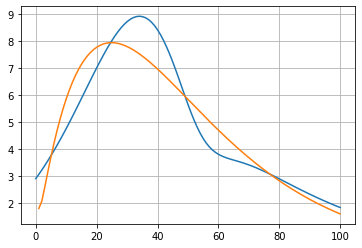

In [ ]:
plt.plot(x,y)
plt.plot(t, g0(t) )
plt.grid()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


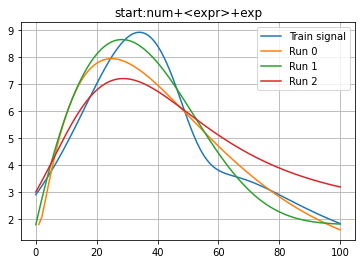

In [ ]:
g0=lambda x: 0.03+((x)/(np.exp((np.exp(-(0.90)))+(((x)*(0.04))-(0.25)))))+((1.91)/((x)+(x)))
g1=lambda x: 2.80+((np.exp(-(np.exp(-(((3.51)-((x)/(4.04)))/(9.96))))))*(x))+((np.exp(-(8.53)))-(np.exp(-(np.exp(-(8.30))))))
g2=lambda x: 0.85+(0.43)+(np.exp(-((np.exp(-(((x)/(6.06))/(np.exp(1.69)))))/((np.exp(-(6.84)))-((7.77)/((4.25)+(x)))))))
g3=lambda x: 2.37+(x)+(((2.72)-(x))*((1.07)-((3.74)/(x))))
plotResult(x,y,g0(t),g1(t), g2(t),'num+<expr>+exp')

## New genotype con value+exp+exp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


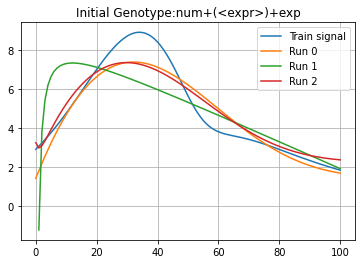

In [ ]:
g0=lambda x:1.42+((np.exp(-(np.exp(-(((3.95)-(x))/((np.exp(3.97))+(np.exp((1.57)/(x)))))))))*(x))+(np.exp(-((x)+((9.71)/(x)))))
g1=lambda x: 1.57+(1.69)+(np.exp(-((np.exp(-((np.exp(4.03))-(x))))-((1.16)+((((x)/(8.99))+((3.27)*(x)))/(np.exp(6.64)))))))
g2=lambda x: 2.25+((np.exp(-(np.exp((x)/(np.exp(3.96))))))*(x))+(np.exp(-(x)))
g3=lambda x: 2.37+(x)+(((2.72)-(x))*((1.07)-((3.74)/(x))))
plotResult(x,y,g0(t),g3(t), g2(t),'num+(<expr>)+exp')

# se modifio el genotipo para tene =r num+exp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


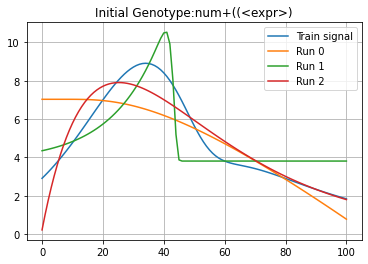

In [ ]:
g0=lambda x: 7.03+(((5.69)-(x))*(np.exp(-((2.05)+(((3.84)/(x))/(np.exp(-(2.85))))))))
g1=lambda x: 3.81+(np.exp(-(((np.exp(-(np.exp(3.77))))*(np.exp(x)))+(((0.62)-((x)/((2.47)-(1.53))))+(x)))))
g2=lambda x: 0.22+((x)/(np.exp((np.exp(-(3.23)))*((x)+(4.83)))))
plotResult(x,y,g0(t),g1(t), g2(t),'num+((<expr>)')

## Datos iniciales con todo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


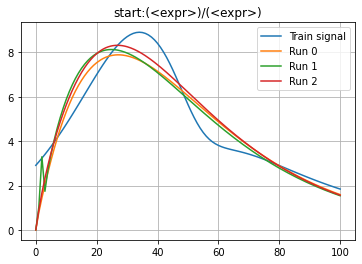

In [ ]:
g0=lambda x: (x)/((np.exp(((x)/(7.01))/(3.45)))+(np.exp(-(np.exp(np.exp(-(((x)/(1.10))*(np.exp(np.exp(-(9.94)))))))))))
g1=lambda x: (x)/(np.exp(((x)/(5.76))/((4.26)-((9.91)/(x)))))
g2=lambda x: (x)/(np.exp((x)/(np.exp((3.18)-(np.exp(-((x)/((2.28)+(6.57)))))))))

plotResult(x,y,g0(t),g1(t), g2(t),'(<expr>)/(<expr>)')

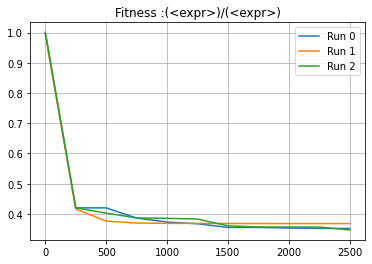

In [ ]:
epoch=[0,250,500,750,1000,1250,1500,1750,2000,2250,2500]
fit0=[1.001, 0.42, 0.4199, 0.3862, 0.3730,  0.3674, 0.3552, 0.3552, 0.3532, 0.3519 ,0.3519]
fit1=[0.9931, 0.4163, 0.3761,  0.3698, 0.3686, 0.3686,0.3682, 0.3681, 0.3679,0.3679,0.3679  ]
fit2=[0.9997, 0.4201, 0.4025, 0.3868, 0.3854, 0.3831, 0.3605, 0.3566, 0.3566,0.3566, 0.347 ] 
plotFitness(epoch, fit0, fit1, fit2,'(<expr>)/(<expr>)')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


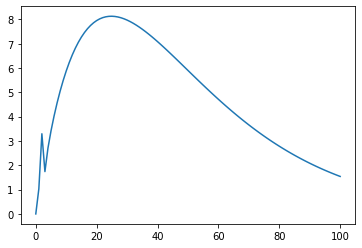

In [ ]:
plt.plot(x,g1(t),label='Run 1')

In [ ]:
(t*np.exp(-(t/36.21)))/np.exp(-(57.33))+(19.22/np.exp(-(np.exp(-(54.28/np.exp(-((t/np.exp(-(t))))))))))
(t*np.exp(-(t/36.21)))/np.exp(-(57.33))+(19.22/np.exp(-(np.exp(-(54.28/np.exp(-((x/np.exp(-(x))))))))))

In [ ]:
g0=lambda t: (t*np.exp(-(t/36.21)))/np.exp(-(57.33))+
              (19.22/np.exp(-(np.exp(-(54.28/np.exp(-((t/np.exp(-(t))))))))))
g1=lambda t: (t*np.exp(-(t/36.21)))/np.exp(-(57.33))+
              (19.22/np.exp(-(np.exp(-(54.28/np.exp(-((t/np.exp(-(t))))))))))
g2=lambda t: np.exp(-(np.exp(-((t/07.43)))))/((21.88+np.exp(-(np.exp(-(np.exp(-(t))))-t/37.37)))
            -np.exp(-(np.exp(-((np.exp(-(np.exp(-((np.exp(-(((t*46.67*t)/t)))/89.61)))))*t)/np.exp(-(61.88)))))))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in true_divide
  


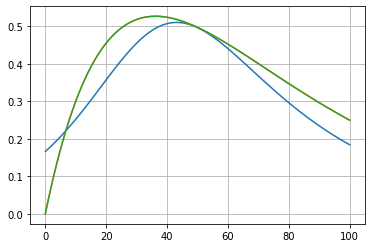

In [ ]:
plt.plot(t,fnc1(t))
plt.plot(t,g0(t)/(2e26))
plt.plot(t,g1(t)/(2e26))

plt.grid()

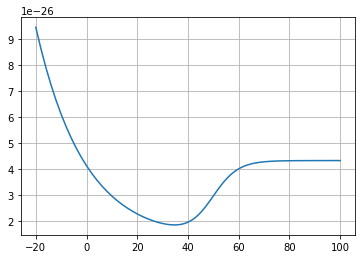

In [72]:
expr="0.666*(1-0.666*(18.975-56.6)|_div_|33.941)|_div_|1+_exp_((33.0-x[0])|_div_|18.975)*(1-_sig_(0.2*(x[0]-(0.666+46.0))))+_sig_(0.2*(x[0]-(0.18+49.2)))*18.975*(1-0.666)*_exp_((13.416+25.9-40.076)|_div_|18.975)|_div_|1+_exp_((52.0-40.076)|_div_|33.941)"
gtest=lambda t: str_to_value(t,expr)
plt.plot(t,gtest(t)/(2e26))
plt.grid()

## datos late

## datos erly

## generar archivos